In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dataset = "/content/drive/MyDrive/IOT/SoundClasification/Dataset"

In [3]:
pip install librosa python_speech_features scipy matplotlib

  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5868 sha256=4db238eeb7b702328276eec8f4b8488289ae67c0ea8e3b59c7f0dbeaad54fc52
  Stored in directory: /root/.cache/pip/wheels/37/01/19/e6c69a32684ab7b2e3ea4985a571d810cf055c72600e7f9f17
Successfully built python_speech_features


In [5]:
import librosa
from python_speech_features import mfcc as psf_mfcc
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Load using librosa
file_path = '/content/drive/MyDrive/IOT/SoundClasification/Dataset/Basin tap/basin_1.wav'
y, sr = librosa.load(file_path, sr=None)

# Load using scipy (for python_speech_features)
sr_psf, audio_psf = wavfile.read(file_path)

# Convert to mono if stereo
if audio_psf.ndim > 1:
    audio_psf = audio_psf.mean(axis=1)

In [14]:
# Librosa MFCCs
mfcc_librosa = librosa.feature.mfcc(y=y, sr=sr_psf, n_mfcc=13)

# python_speech_features MFCCs
mfcc_psf = psf_mfcc(signal=audio_psf, samplerate=sr_psf, numcep=13)


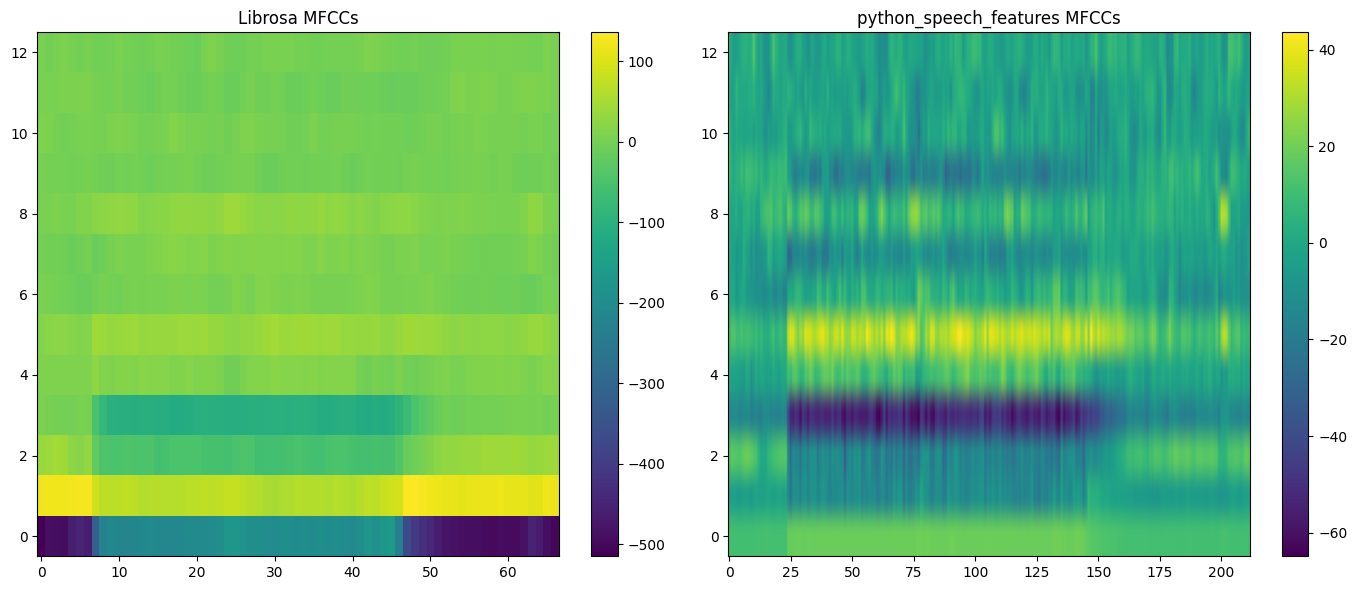

In [15]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.imshow(mfcc_librosa, aspect='auto', origin='lower')
plt.title("Librosa MFCCs")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(mfcc_psf.T, aspect='auto', origin='lower')  # Transpose to match
plt.title("python_speech_features MFCCs")
plt.colorbar()

plt.tight_layout()
plt.show()


In [16]:
mse = np.mean((mfcc_librosa - mfcc_psf) ** 2)
print("Mean Squared Error between MFCCs:", mse)

ValueError: operands could not be broadcast together with shapes (13,67) (212,13) 